In [1]:
#Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [3]:
df=pd.read_csv("50_startups.csv")

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [55]:
df2=df.rename({"R&D Spend":"RDspend"},axis=1)

In [58]:
df3=df2.rename({"Marketing Spend":"Marketing_Spend"},axis=1)

In [60]:
#Correlation Matrix
cars.corr()
df3.corr()

,RDspend,Administration,Marketing_Spend,Profit
RDspend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


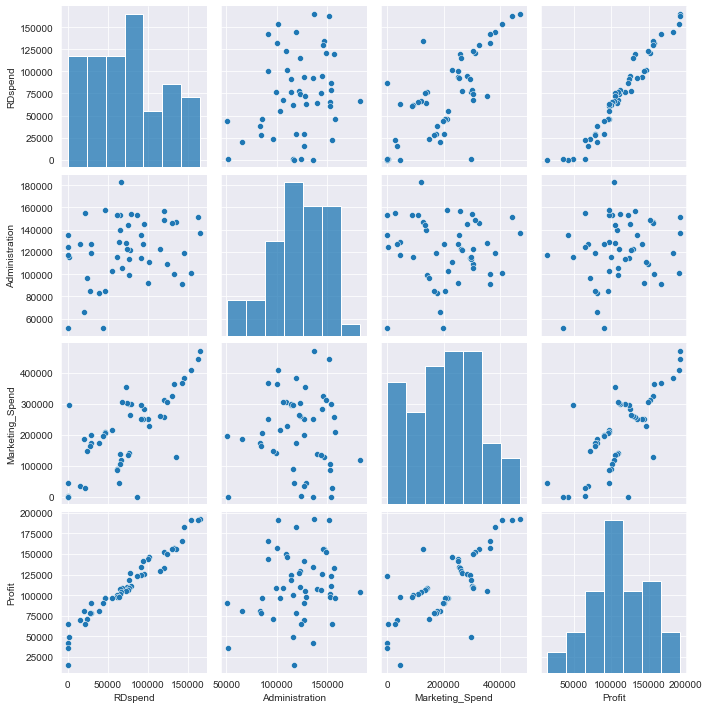

In [61]:
sns.set_style(style="darkgrid")
sns.pairplot(df3)

In [39]:
import statsmodels.formula.api as smf

In [66]:
#Preparing a model¶
model=smf.ols("Profit~RDspend+Administration+Marketing_Spend",data=df3).fit()

In [68]:
model.params

Intercept          50122.192990
RDspend                0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [75]:
print(model.tvalues,"\n",model.pvalues)

Intercept           7.626218
RDspend            17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64 
 Intercept          1.057379e-09
RDspend            2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [76]:
print(model.rsquared,model.rsquared_adj)

0.9507459940683246 0.9475337762901719


In [81]:
#Simple Linear Regression Models
ml_v=smf.ols('MPG~VOL',data = cars).fit()  
mp_a=smf.ols("Profit~Administration",data=df3).fit()

In [82]:
print(mp_a.tvalues,"\n",mp_a.pvalues)

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [83]:
mp_ma=smf.ols("Profit~Marketing_Spend",data=df3).fit()

In [85]:
print(mp_ma.tvalues,"\n",mp_ma.pvalues)

Intercept          7.808356
Marketing_Spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_Spend    4.381073e-10
dtype: float64


In [129]:
mp_ad=smf.ols("Profit~Administration+Marketing_Spend",data=df3).fit()

In [130]:
print(mp_ad.tvalues,"\n",mp_ad.pvalues)

Intercept          1.142741
Administration     2.467779
Marketing_Spend    8.281039
dtype: float64 
 Intercept          2.589341e-01
Administration     1.729198e-02
Marketing_Spend    9.727245e-11
dtype: float64


In [87]:
#Calculating VIF¶
rsq_rd = smf.ols('RDspend~Administration+Marketing_Spend',data=df3).fit().rsquared  
vif_rd = 1/(1-rsq_rd)

In [90]:
rsq_ad=smf.ols('Administration~RDspend+Marketing_Spend',data=df3).fit().rsquared
vif_ad=1/(1-rsq_ad)

In [92]:
rsq_mk=smf.ols('Marketing_Spend~Administration+Marketing_Spend',data=df3).fit().rsquared
vif_mk=1/(1-rsq_mk)

<ipython-input-92-9751119fdccb>:2: RuntimeWarning: divide by zero encountered in double_scalars
  vif_mk=1/(1-rsq_mk)


In [100]:
vif_mk

inf

In [98]:
d1= {'variables':['RDspend','Administration','Marketing_Spend'],'VIF':[vif_rd,vif_ad,vif_mk]}
vif_frame=pd.DataFrame(d1)

In [99]:
vif_frame

,variables,VIF
0,RDspend,2.468903
1,Administration,1.175091
2,Marketing_Spend,inf


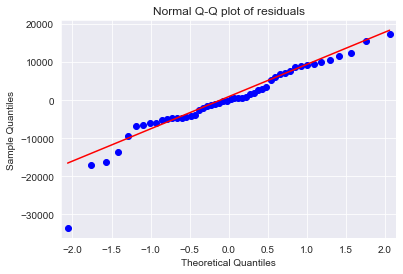

In [101]:
#Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [103]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [105]:
#Residual Plot for Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

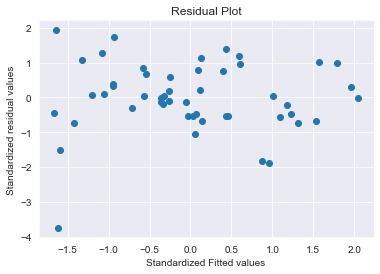

In [106]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

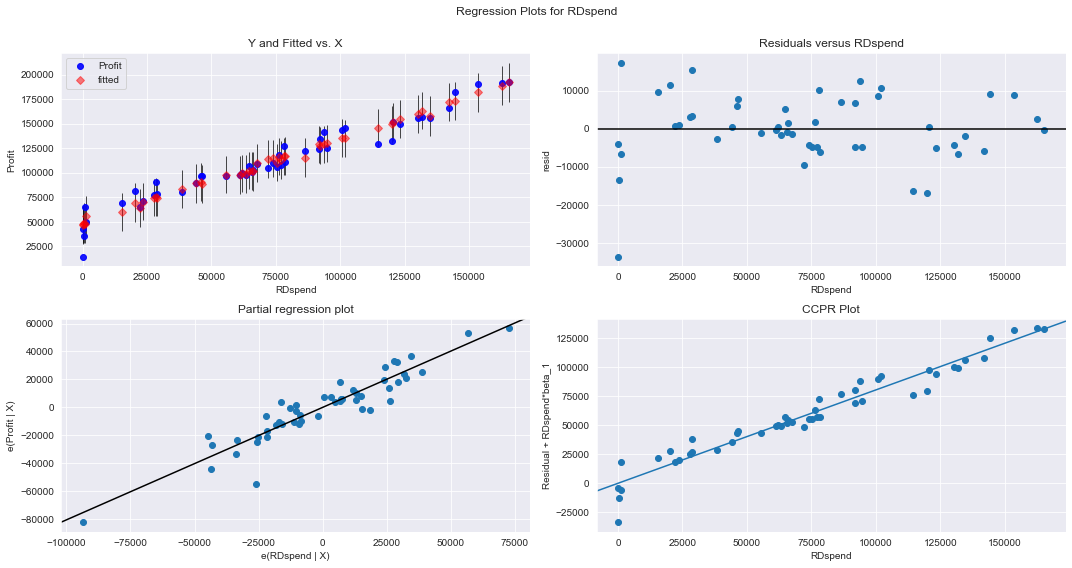

In [107]:
#Residual Vs Regressors
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDspend", fig=fig)
plt.show()

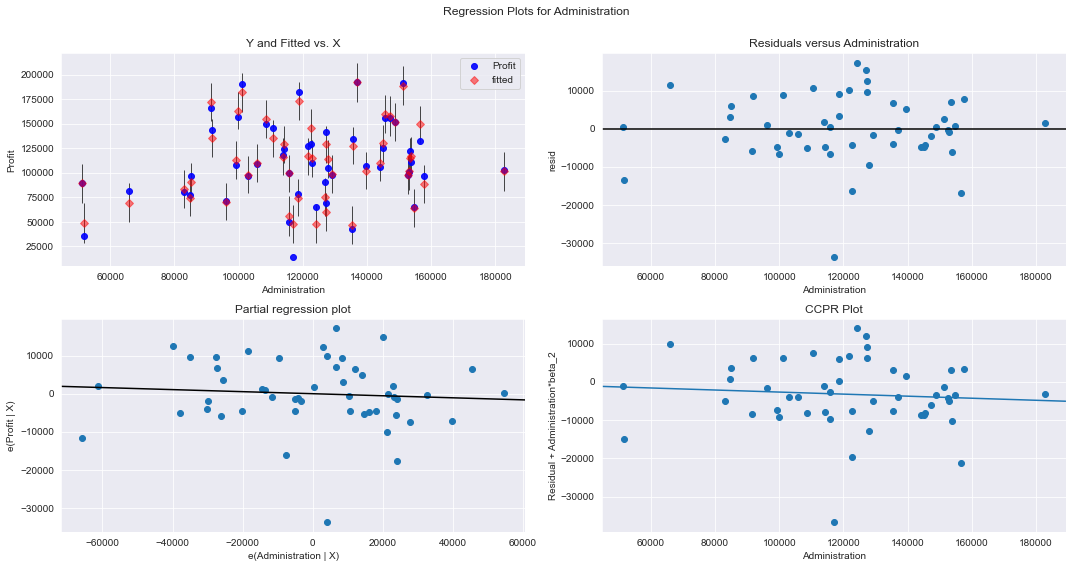

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

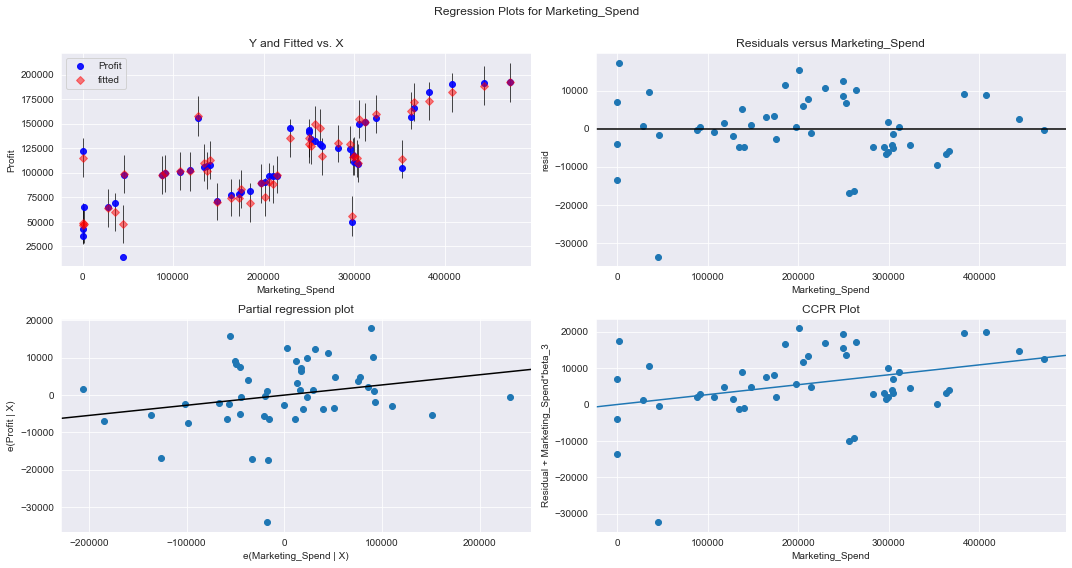

In [113]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

In [114]:
#Cook’s Distance
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

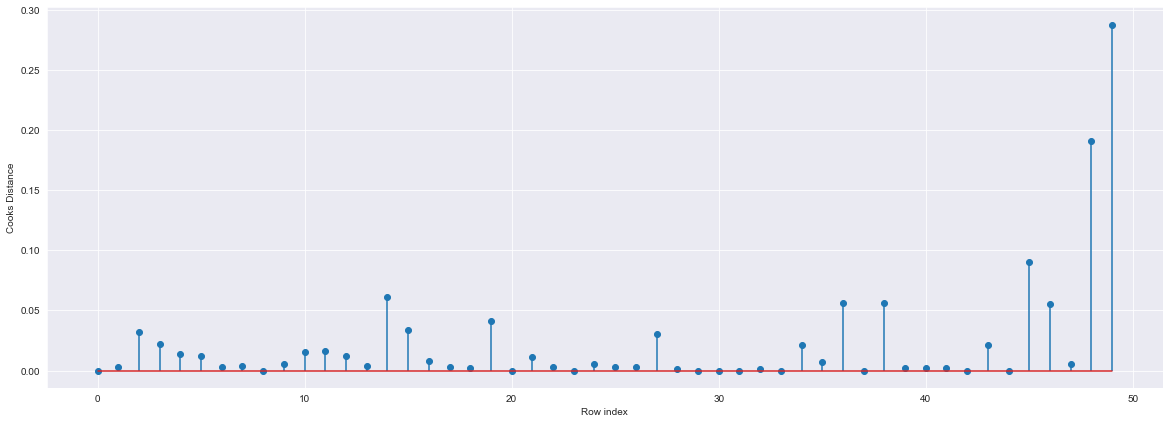

In [116]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [117]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

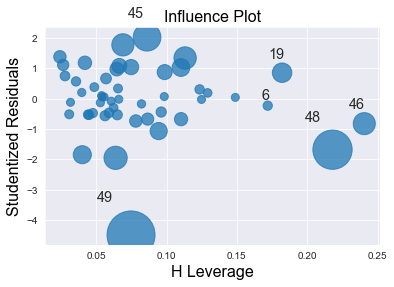

In [118]:
#High Influence points
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [120]:
k = df3.shape[1]
n = df3.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [123]:
df3[df3.index.isin([45,46,49,48])]

,RDspend,Administration,Marketing_Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [124]:

df3.head()

,RDspend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [126]:
#Improving the model
df4=df3.drop(df3.index[[45,46,48,49]],axis=0).reset_index()

In [127]:
df4=df4.drop(['index'],axis=1)

In [131]:
#Build Model
final_pra=smf.ols("Profit~RDspend+Administration",data=df4).fit()

In [132]:
(final_pra.rsquared,final_pra.aic)

(0.959323635951178, 951.9187019793172)

In [135]:
final_prd=smf.ols("Profit~RDspend+Marketing_Spend",data=df4).fit()

In [136]:
(final_prd.rsquared,final_prd.aic)

(0.9611920624974509, 949.7556721616616)

In [137]:
#Cook’s Distance
model_influence_V = final_pra.get_influence()
(c_V, _) = model_influence_V.cooks_distance

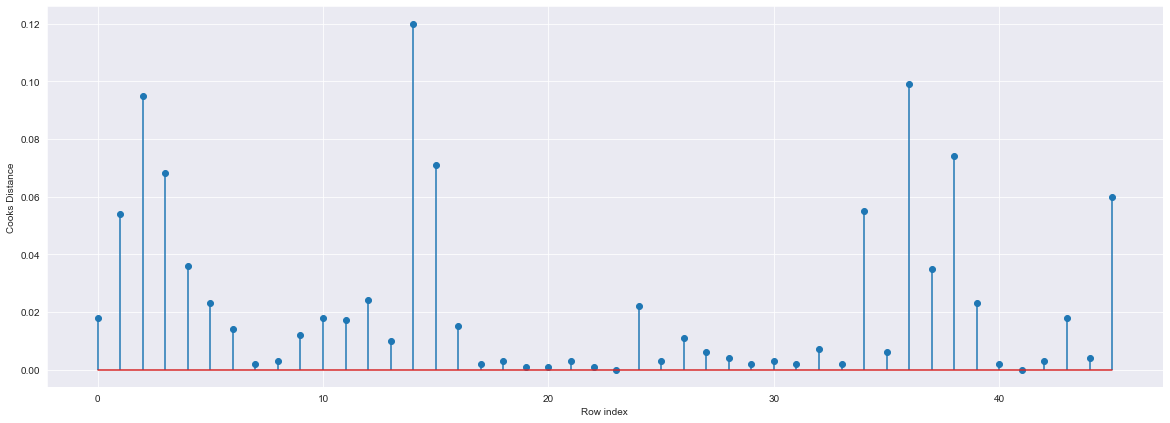

In [140]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [141]:
(np.argmax(c_V),np.max(c_V))

(14, 0.1203531070081363)

In [142]:
df5=df4.drop(df4.index[[1,2,3,14,15,34,36,37,38,45]],axis=0)

In [144]:
df6=df5.reset_index()

In [145]:
df7=df6.drop(['index'],axis=1)

In [149]:
#Build the model on the new data
final_prs=smf.ols("Profit~RDspend+Marketing_Spend",data=df7).fit()

In [150]:
model_influence_V = final_prs.get_influence()
(c_V, _) = model_influence_V.cooks_distance

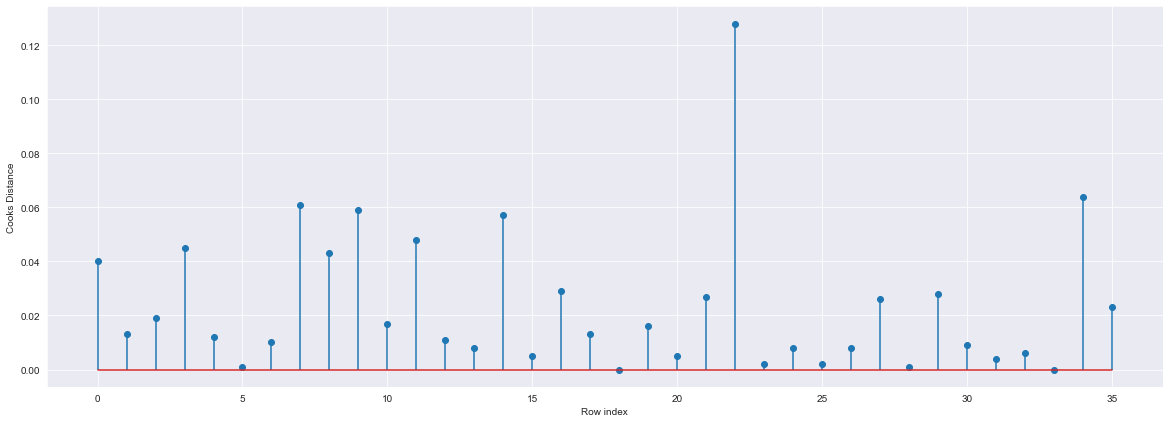

In [151]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df7)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [152]:
(np.argmax(c_V),np.max(c_V))

(22, 0.12767901025002423)

In [153]:
#Check the accuracy of the mode
final_prs=smf.ols("Profit~RDspend+Marketing_Spend",data=df7).fit()

In [155]:

(final_prs.rsquared,final_prs.aic)

(0.9683031042382789, 725.7159629499113)

In [159]:

#New data for prediction
2
new_data=pd.DataFrame({'HP
new_data=pd.DataFrame({'RDspend':16600,"Marketing_Spend":14500,'administration':12300},index=[1])

In [160]:
final_prs.predict(new_data)

1    64300.704786
dtype: float64

In [164]:
final_prs.predict(new_data.iloc[0:5,])

1    64300.704786
dtype: float64

In [165]:
pred_prs = final_prs.predict(new_data)

In [166]:
pred_prs

1    64300.704786
dtype: float64

In [180]:
#Consider only the below columns and prepare a prediction model for predicting Price.
data=pd.read_csv("Toyota.csv")

In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [184]:
data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [185]:
data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


In [188]:
data2=data.rename({"Age_08_04":"Age"},axis=1)

In [189]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


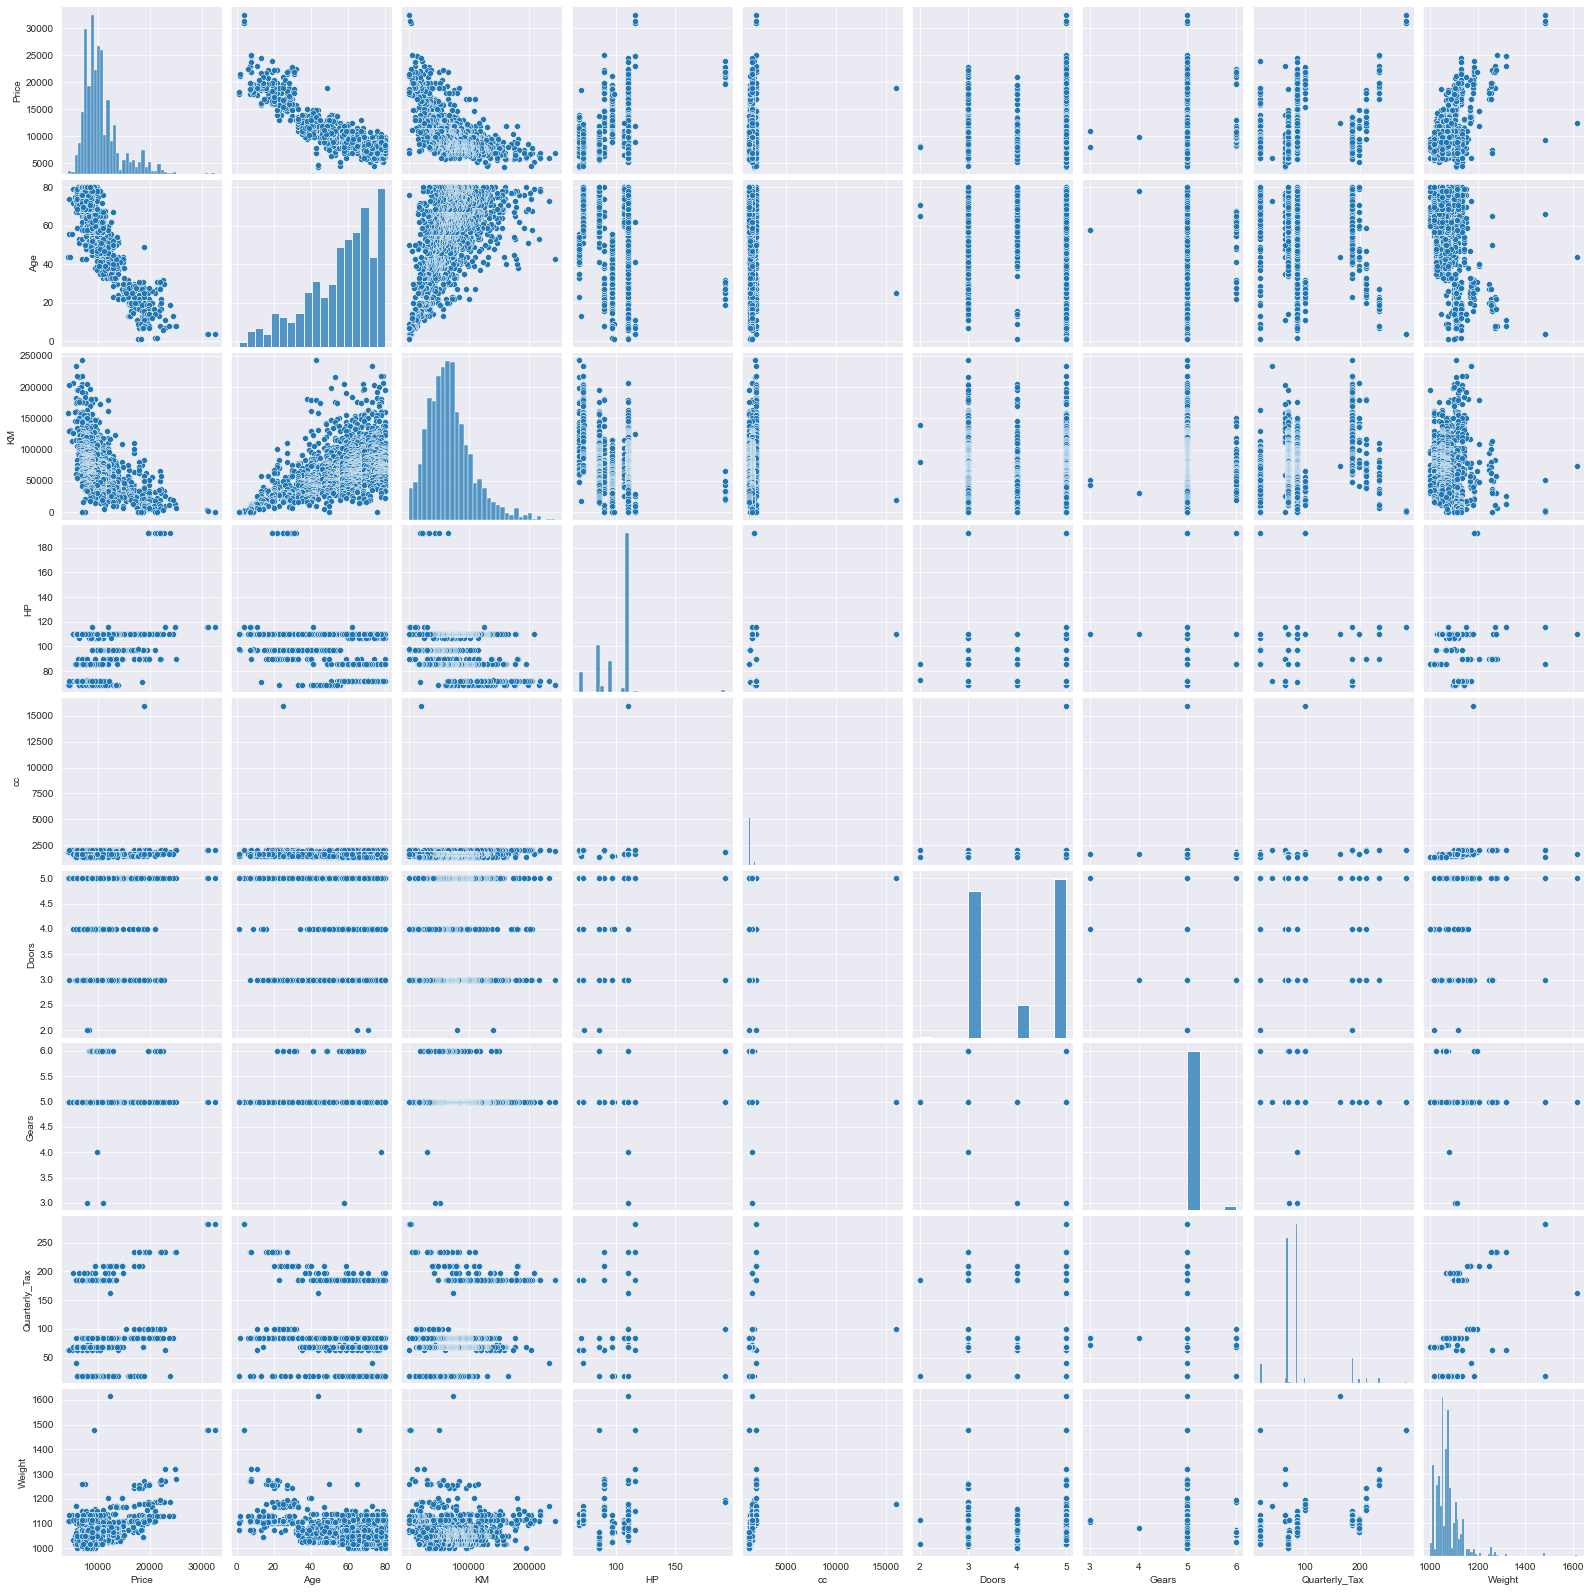

In [191]:
sns.set_style(style="darkgrid")
sns.pairplot(data2)

In [192]:
import statsmodels.formula.api as smf

In [195]:
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=data2).fit()

In [196]:
model

In [197]:
model.params

Intercept       -5573.106358
Age              -121.658402
KM                 -0.020817
HP                 31.680906
cc                 -0.121100
Doors              -1.616641
Gears             594.319936
Quarterly_Tax       3.949081
Weight             16.958632
dtype: float64

In [200]:
print(model.tvalues,"/n",model.pvalues)

Intercept        -3.948666
Age             -46.511852
KM              -16.621622
HP               11.241018
cc               -1.344222
Doors            -0.040410
Gears             3.016007
Quarterly_Tax     3.014535
Weight           15.879803
dtype: float64 /n Intercept         8.241949e-05
Age              3.354724e-288
KM                7.538439e-57
HP                3.757218e-28
cc                1.790902e-01
Doors             9.677716e-01
Gears             2.606549e-03
Quarterly_Tax     2.619148e-03
Weight            2.048576e-52
dtype: float64


In [199]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [201]:
m_pc=smf.ols("Price~cc",data=data2).fit()

In [202]:
model.rsquared,model.rsquared_adj

(0.8637627463428192, 0.8629989775766963)

In [203]:
print(m_pc.tvalues,"\n",m_pc.pvalues)

Intercept    24.694090
cc            4.824822
dtype: float64 
 Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64


In [205]:
m_pd=smf.ols("Price~Doors",data=data2).fit()

In [207]:
print(m_pd.tvalues,"\n",m_pd.pvalues)

Intercept    19.258097
Doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64


In [209]:
m_pcd=smf.ols("Price~Doors+cc",data=data2).fit()

In [210]:
print(m_pcd.tvalues,"\n",m_pcd.pvalues)

Intercept    12.620704
Doors         6.816153
cc            4.340400
dtype: float64 
 Intercept    1.056885e-34
Doors        1.373469e-11
cc           1.521992e-05
dtype: float64


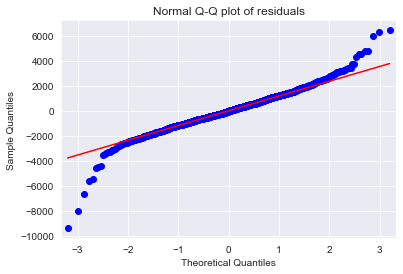

In [211]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [212]:
list(np.where(model.resid>10))

[array([   6,    7,    8,   10,   13,   14,   15,   16,   17,   18,   19,
          20,   21,   22,   23,   24,   26,   27,   28,   29,   32,   35,
          36,   38,   41,   43,   45,   46,   47,   49,   51,   52,   53,
          56,   58,   59,   61,   62,   63,   64,   65,   66,   68,   69,
          70,   72,   74,   75,   76,   77,   78,   80,   81,   83,   84,
          85,   88,   89,   90,   91,   92,   94,   95,   98,   99,  100,
         102,  103,  104,  105,  106,  107,  108,  109,  110,  111,  112,
         113,  114,  115,  116,  118,  119,  120,  121,  123,  125,  126,
         127,  128,  134,  136,  138,  139,  141,  142,  143,  144,  146,
         147,  148,  149,  150,  151,  152,  153,  154,  156,  157,  158,
         159,  160,  161,  162,  163,  165,  166,  167,  168,  169,  170,
         171,  172,  173,  174,  175,  176,  177,  178,  179,  180,  181,
         182,  183,  190,  194,  196,  197,  201,  204,  205,  210,  211,
         216,  223,  230,  232,  233, 

In [213]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

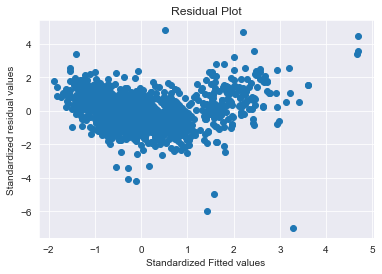

In [214]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

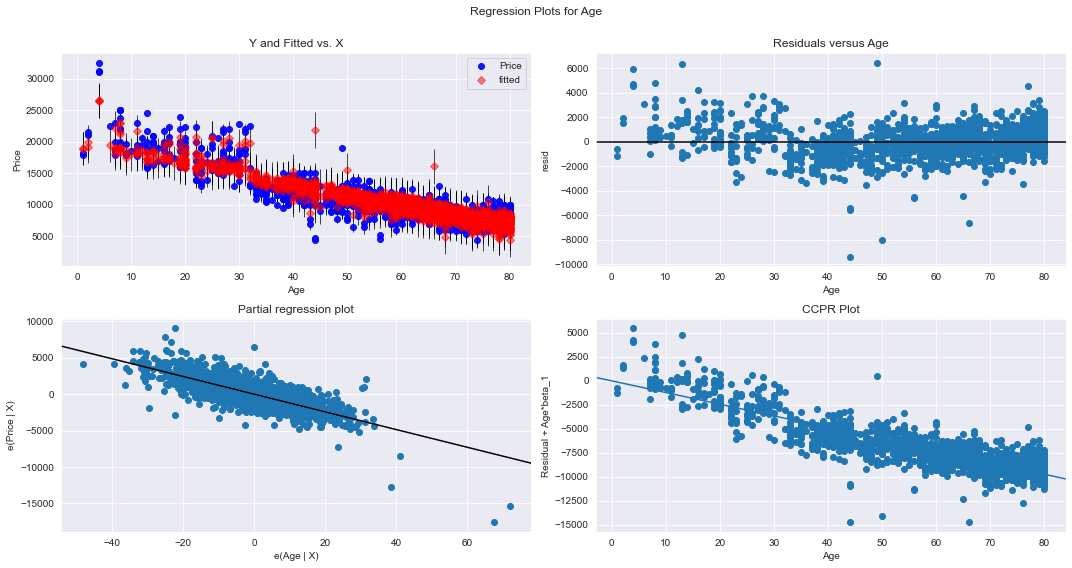

In [215]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

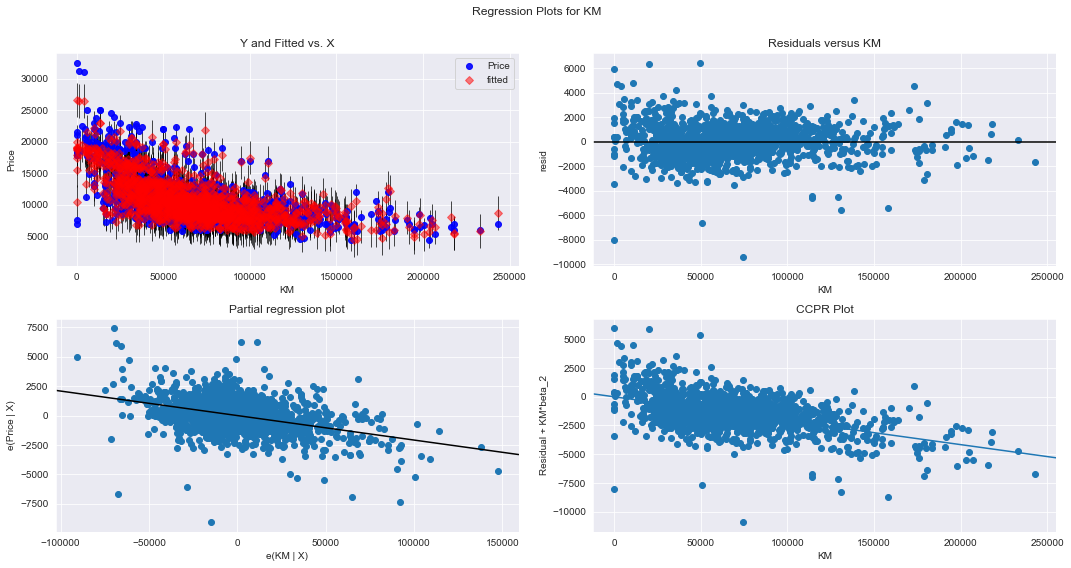

In [216]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

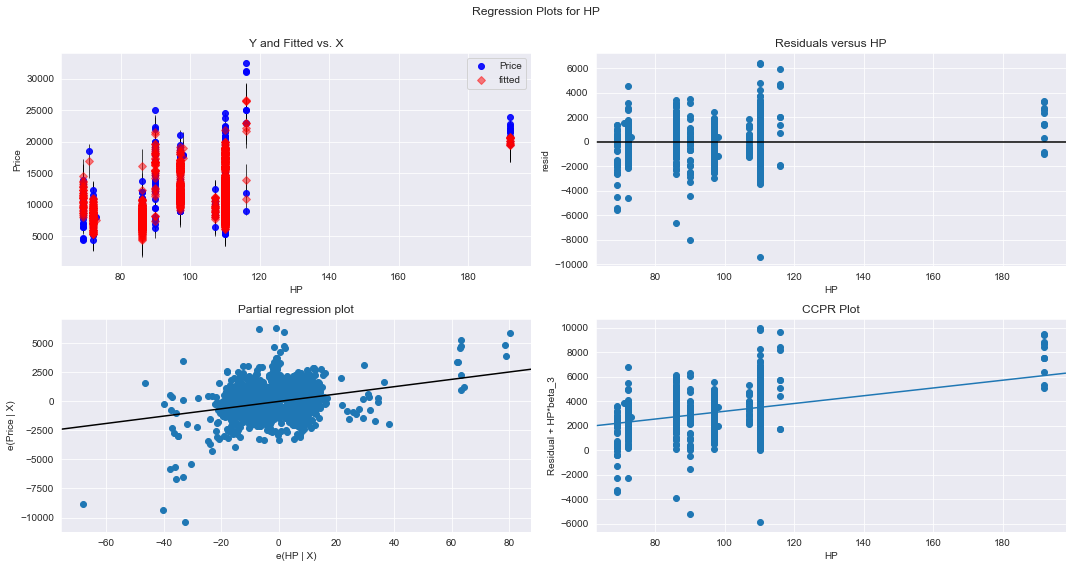

In [218]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

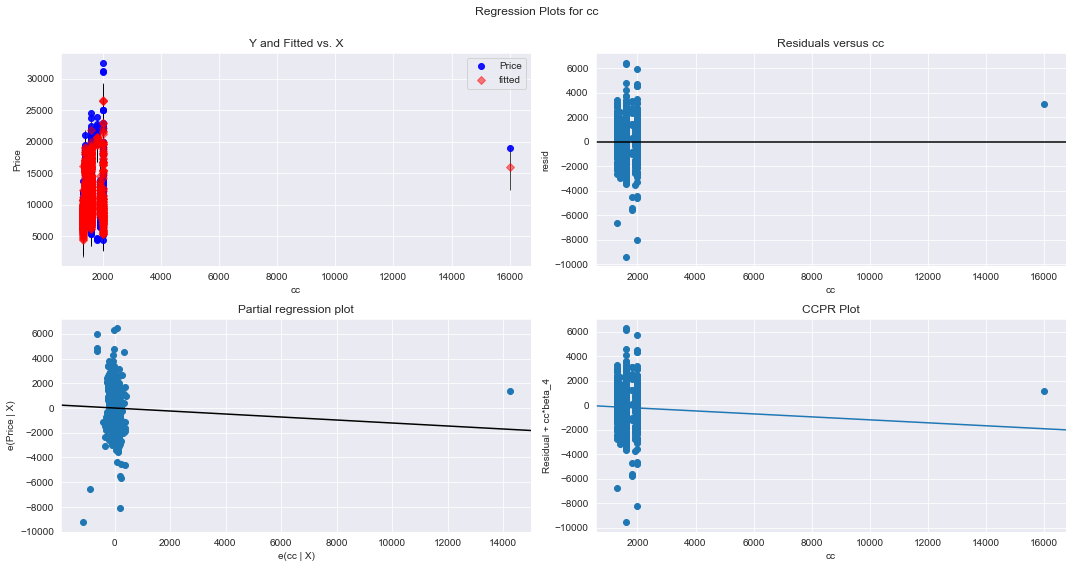

In [219]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

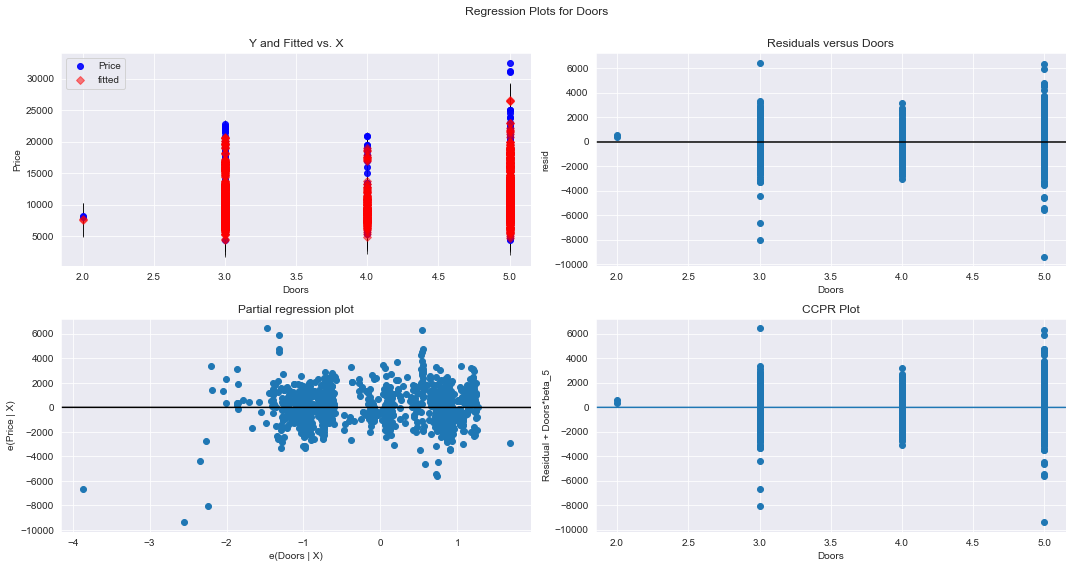

In [220]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Doors", fig=fig)
plt.show()

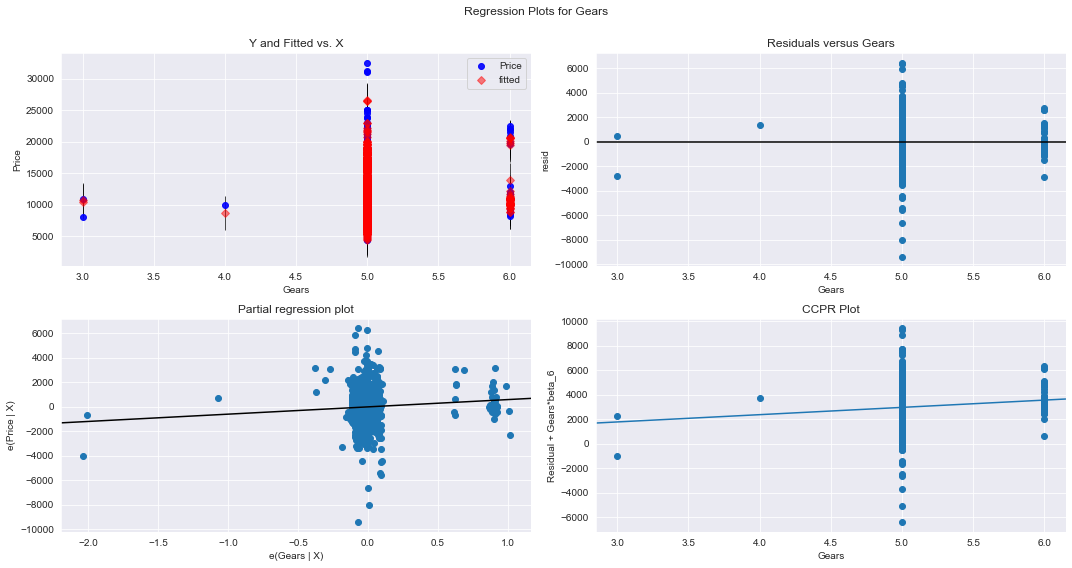

In [221]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

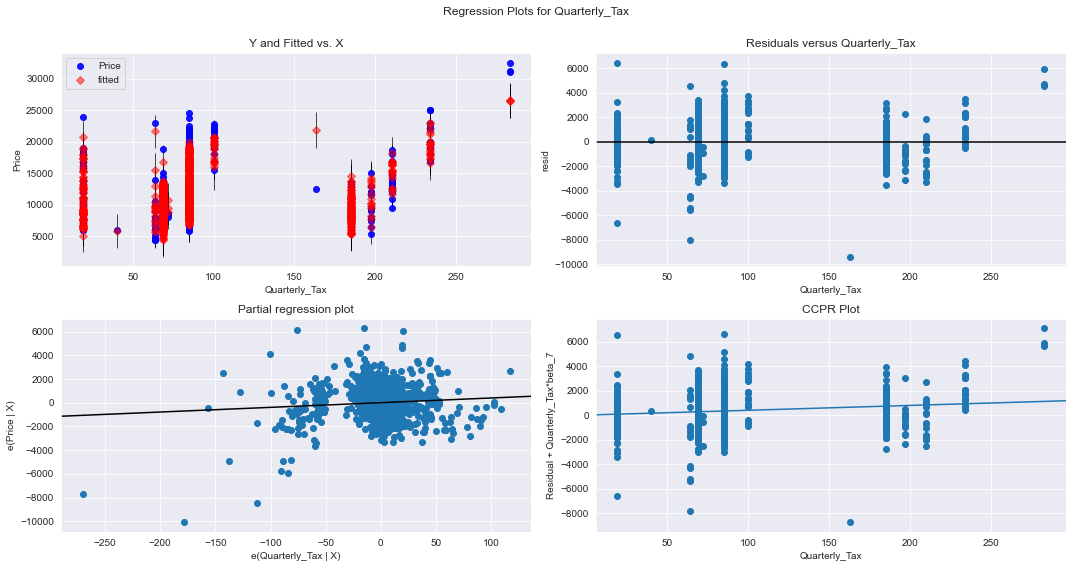

In [222]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

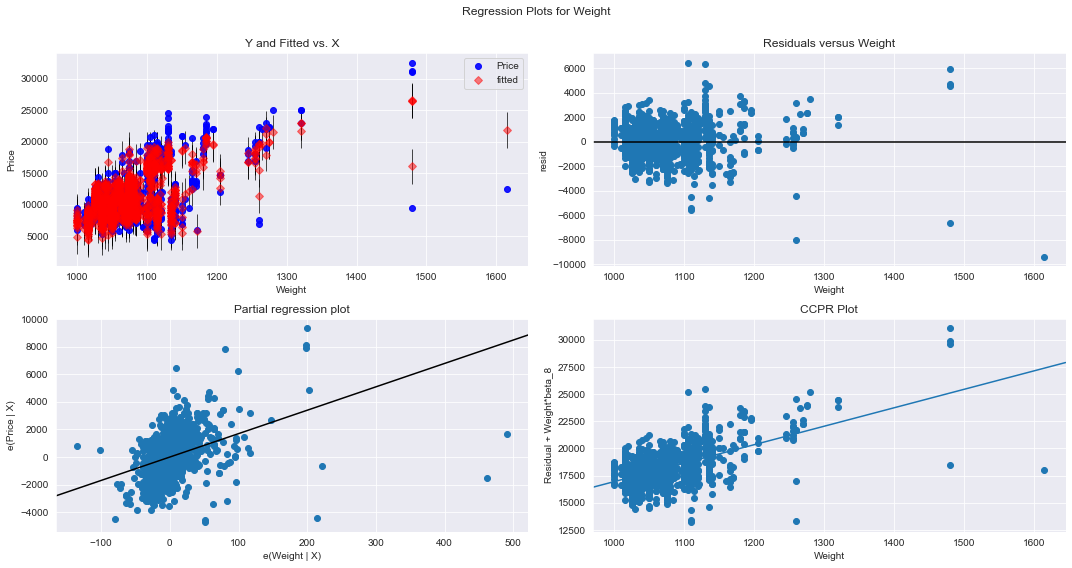

In [223]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

In [224]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

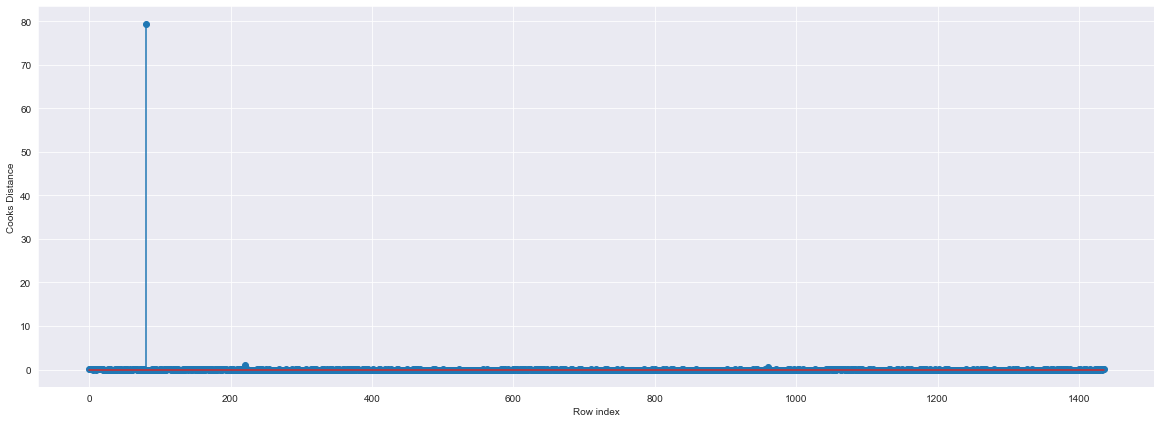

In [225]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data2)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [226]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(80, 79.52010624138055)

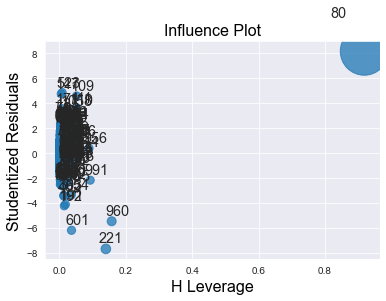

In [227]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [229]:
k = data2.shape[1]
n = data2.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [230]:
data2[data2.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [231]:
data2

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [232]:
data3=data2.drop(data2.index[[80]],axis=0).reset_index()

In [233]:
data3=data3.drop(['index'],axis=1)

In [246]:
final_md=smf.ols("Price~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [247]:
(final_md.rsquared,final_md.aic)

(0.8631959819380925, 24751.649416173997)

In [248]:
final_mc=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [249]:
(final_mc.rsquared,final_mc.aic)

(0.8693349475698542, 24685.765438793034)

In [255]:
model_influence = final_md.get_influence()
(c, _) = model_influence.cooks_distance

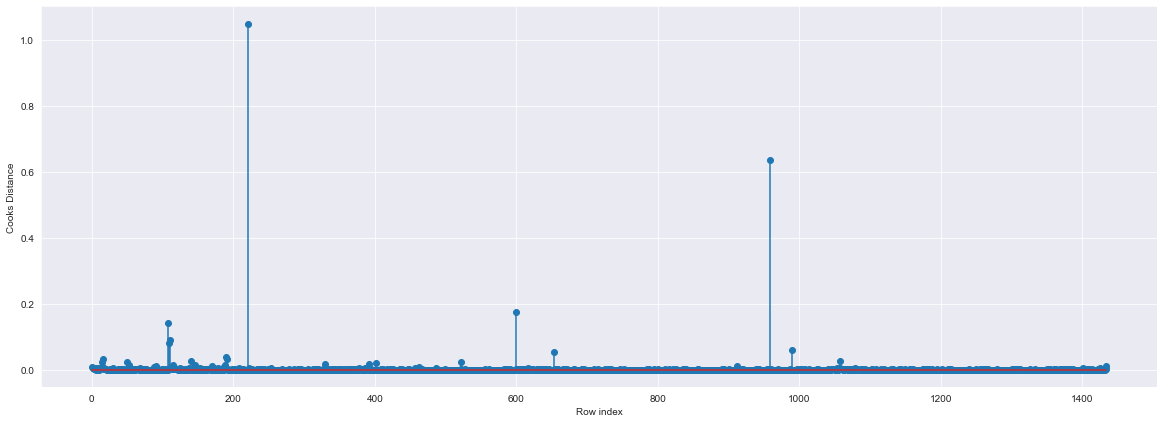

In [256]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

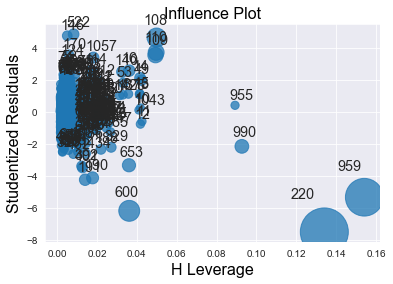

In [257]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [265]:
(np.argmax(c),np.max(c))

(220, 1.0492259521311074)

In [270]:
data3.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [278]:
data4=data3.drop(data3.index[[959,220]],axis=0).reset_index()

In [284]:
final_mod=smf.ols("Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=data3).fit()

In [285]:
(final_mod.rsquared,final_mod.aic)

(0.8693349475698542, 24685.765438793034)

In [286]:
new_data=pd.DataFrame({'Age':25,'KM':45000,'HP':91,'cc':1965,'Doors':4,'Gears':6,'Quarterly_Tax':211,'Weight':1166},index=[1])

In [287]:
final_mod.predict(new_data)

1    16996.29835
dtype: float64

In [288]:
final_mod.predict(new_data.iloc[0:7,])

1    16996.29835
dtype: float64

In [289]:
pred_y = final_mod.predict(new_data)

In [290]:
pred_y

1    16996.29835
dtype: float64